# Data Prep

### Data Fetch From Trino


In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client, 
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is Clusters with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import getpass
import datetime

# Get password
password = getpass.getpass("Enter your password: ")

# Connect to Trino
conn = trino.dbapi.connect(
    host="presto-gateway.corp.mongodb.com",
    port=443,
    user="jiawei.zhou@mongodb.com",
    catalog="awsdatacatalog",
    http_scheme="https",
    auth=trino.auth.BasicAuthentication("jiawei.zhou@mongodb.com", password),
)

# Execute query
cur = conn.cursor()

/Users/jiawei.zhou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cur.execute(
    f"""
select
	*
from
	awsdatacatalog.product_analytics.pnl_products_adoption_qualification_activation
"""
)

# Extract column names
columns = [desc[0] for desc in cur.description]

# Fetch rows
rows = cur.fetchall()

# Create DataFrame
df_raw = pd.DataFrame(rows, columns=columns)

In [3]:
# Set the maximum number of displayed rows
pd.set_option("display.max_rows", 100)

# Set the maximum number of displayed columns
pd.set_option("display.max_columns", 100)

# Data Profiling

In [4]:
# Base product name
product = 'text_search'

# Dynamically generate column names based on the product
product_ds = f"{product}_ds"
product_ind = f"{product}_ind"

# Print the results to verify
print(product_ds)
print(product_ind)

text_search_ds
text_search_ind


In [5]:
# Create a copy of the original DataFrame
data = df_raw.copy()

# Display rows
data.head()

,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,org_created_date,org_registration_date,org_type,org_country,org_latest_mrr,email_segment_clean,marketing_channel_group,channel_group,channel_type,account_segment,atlas_org_region,pw_language,first_cluster_instance_size,first_cluster_instance_size_group,self_serve_or_sales_sold,atlas_org_registration_date,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind
0,452.498611,5e862bfd53711f38f7c65164,Promofarma,NDS,602bcf4543d4f04a2e79a825,Zurrose-shop,NDS,False,644b80eedb021a3ab294d2a3,pro-ch-mongo-orders,atlas-11foum,pro-ch-mongo-orders,[644b83111aeaca6100b33b5d],2023-04-28 08:16:46.285,5.0,None,[GCP],1,[EUROPE_WEST_6],1,False,M20,None,General,PAID,False,REPLICASET,1,False,1,False,6.0,6.0.10,200.0,False,False,True,SNAPSHOTS,True,False,False,3.0,0.0,0.0,0.0,False,secondary,IDLE,NaN,None,...,2020-04-02 18:16:29.243,2020-04-02 18:16:29.280,NDS,ES,3618.822917,Social,Organic Search,Organic Search,Non-Paid,High Tech,EMEA,PHP,M0,Free,Self Serve,2020-04-02,2.0,4.318329,60.423611,15.521049,2.107403,0.453683,2.064904,6.601694e+09,4.321575,60.366667,15.471289,2.025261,0.345038,1.252962,6.607116e+09,2023-09-01,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0
1,63.591111,5f1132b1de52bd5ef7cd5494,Cleartax,NDS_PRO,5f11338a30ef1b0c1b632e11,Pritunl Zero,NDS,False,5f115ada30ef1b0c1b6537f8,pritunl-zero,atlas-wvz1lp,pritunl-zero,[5f115cce975e0a2b7ca9494c],2020-07-17 08:01:30.145,38.0,None,[AWS],1,[AP_SOUTH_1],1,False,M10,T3,General,PAID,False,REPLICASET,1,False,1,False,4.4,4.4.24,10.0,False,False,True,SNAPSHOTS,True,False,False,3.0,0.0,0.0,0.0,False,secondary,IDLE,3000.0,Gp3,...,2020-07-17 05:10:09.349,2020-07-17 05:13:46.701,NDS,IN,88517.541925,Business,Organic Search,Organic Search,Non-Paid,Enterprise,APAC,Java,M10,Dedicated,Self Serve,2020-07-17,4.0,1.763052,54.841667,19.275284,5.569425,0.195364,24.845745,1.058477e+09,1.763716,54.633333,19.307296,5.577780,0.194806,24.920070,1.058583e+09,2023-09-01,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0
2,9.125000,5f970102dc1b101e2fed43bd,Mossettes,NDS,5f970e06d0d92727012df69c,ImmigrationPlannerProd,NDS,False,5f9862f31f5881328b2e087c,cluster-xh0c8193,atlas-mt9ny7,cluster-xh0c8193,[5f98637529320001e01ffe5c],2020-10-27 18:12:03.795,35.0,None,[AWS],1,[US_EAST_1],1,False,M2,None,General,PAID,False,REPLICASET,1,False,1,False,6.0,6.0.10,2.0,False,False,True,TENANT,False,False,False,3.0,0.0,0.0,0.0,False,secondary,IDLE,NaN,None,...,2020-10-26 17:01:54.5

In [6]:
import pandas as pd

# Set pandas option to display float format without scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

# Use the describe function and print the result
data.describe()

,cluster_mrr_total,created_at,cluster_age_month,cloudprovider_count,region_count,replicaset_count,shard_count,disk_size_gb,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,disk_iops,connection_limit,database_limit,gb_per_week_in_limit,gb_per_week_out_limit,operations_per_second_limit,throttled_kb_per_second_limit,org_created_date,org_registration_date,org_latest_mrr,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,text_search_ind,vector_search_ind,timeseries_ind,sync_ind,triggers_functions_ind,charts_ind,onlinearchive_ind,adf_ind,sql_ind
count,2025815.00,2025782,2025782.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025782.00,2025782.00,2025782.00,2025782.00,1129597.00,334204.00,334204.00,272593.00,272593.00,272593.00,272593.00,2025775,2025774,2021570.00,1985182.00,1689039.00,1961589.00,1961440.00,1961738.00,1961738.00,1688781.00,1961738.00,1689039.00,1961589.00,1961440.00,1961738.00,1961738.00,1688781.00,1961738.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00
mean,453.78,2022-01-26 23:05:44.357000704,18.82,1.00,1.06,1.02,1.02,124.60,3.08,0.01,0.01,0.02,3118.36,499.85,90.78,24.62,28.75,269.23,100.00,2020-08-13 09:21:58.909186048,2020-07-10 11:04:24.779189248,40054.89,12.16,4.55,183.13,57.36,80.61,34.62,641.57,121370858880.29,4.40,183.41,56.38,78.78,29.83,573.92,121479561265.73,0.03,0.00,0.01,0.01,0.04,0.04,0.01,0.01,0.00
min,0.01,2016-05-23 00:26:36.730000,0.00,1.00,1.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,100.00,0.00,50.00,20.00,20.00,0.00,100.00,2017-08-24 13:36:38.707000,2016-01-13 00:05:48.253000,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,58.52,2021-03-22 17:02:53.741999872,5.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2019-06-06 15:50:45.088000,2019-05-06 23:33:24.908000,151.74,1.00,2.14,53.07,15.07,0.95,0.18,1.01,733355128.36,2.11,53.03,15.08,0.90,0.19,0.93,733499160.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,74.83,2022-05-27 08:33:00.684000,14.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2020-07-29 15:03:20.032999936,2020-07-06 21:45:48.116999936,1442.87,3.00,2.95,71.80,16.65,1.82,0.25,4.12,1624930317.32,2.81,71.74,16.49,1.75,0.22,2.23,1625031724.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,205.40,2023-02-24 13:49:44.719000064,29.00,1.00,1.00,1.00,1.00,40.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2021-12-14 12:37:48.992999936,2021-11-29 07:06:31.400000,14688.66,6.00,4.62,132.21,27.70,12.56,1.94,59.96,11351208603.85,4.45,132.00,26.24,10.34,1.14,38.55,11352831455.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,413801.50,2024-02-29 00:33:09.244000,93.00,3.00,17.00,42.00,42.00,16384.00,210.00,30.00,3.00,14.00,64000.00,500.00,100.00,2000.00,100.00,2000.00,100.00,2024-02-28 23:42:06.881000,2024-02-28 23:42:07.055000,2340617.26,656.00,99.28,161251.72,118560.82,217043.03,526294.43,2458866.65,237755508943606.56,99.66,161319.71,117650.46,209043.79,579708.79,2520436.76,237763145256342.19,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,2623.88,NaN,16.44,0.06,0.34,0.31,0.31,421.62,0.99,0.22,0.07,0.14,1412.12,8.25,19.39,19.61,16.71,143.32,0.00,NaN,NaN,142067.68,45.25,5.69,873.24,407.19,741.51,738.64,9355.45,1413285339167.10,5.68,873.74,410.10,747.84,745.42,9381.29,1416808181823.39,0.18,0.04,0.09,0.

### Null & 0 Values

In [7]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the null values count for each column
null_values = data.isnull().sum()

# Calculate the percentage of null values for each column
null_values_percentage = (null_values / total_clusters) * 100

# Calculate the 0 values count for each column
zero_values = (data == 0).sum()

# Calculate the percentage of 0 values for each column
zero_values_percentage = (zero_values / total_clusters) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame(
    {"Null Count": null_values, "Null Percentage": null_values_percentage}
)

# Create a DataFrame to display the 0 values count and percentage
zero_values_df = pd.DataFrame(
    {"Zero Count": zero_values, "Zero Percentage": zero_values_percentage}
)

# Merge the two DataFrames for a comprehensive view
values_df = pd.concat([null_values_df, zero_values_df], axis=1)

# Format the percentage values to string with a '%' sign for better readability
values_df = values_df.applymap(lambda x: f"{x:.2f}%" if isinstance(x, float) else x)

# Display rows where the Null Count or Zero Count is greater than 0
filtered_values_df = values_df[
    (values_df["Null Count"] > 0) | (values_df["Zero Count"] > 0)
]

# If you want to see the result
filtered_values_df

,Null Count,Null Percentage,Zero Count,Zero Percentage
is_internal_org,0,0.00%,2025815,100.00%
deployment_cluster_name,33,0.00%,0,0.00%
cluster_name_prefix,33,0.00%,0,0.00%
monitoring_cluster_id,58036,2.86%,0,0.00%
created_at,33,0.00%,0,0.00%
cluster_age_month,33,0.00%,114017,5.63%
deleted_at,2025815,100.00%,0,0.00%
is_cross_region,0,0.00%,1938329,95.68%
instance_family,1225362,60.49%,0,0.00%
instance_class,61611,3.04%,0,0.00%


In [8]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the percentage of null values for each column
null_values_percentage = (data.isnull().sum() / total_clusters) * 100

# Identify columns to exclude from dropping (i.e., keep these columns regardless of their null percentage)
columns_to_keep = [product_ds, product_ind]

# Find columns with >= 40% null values, excluding the specified columns
columns_to_drop = [
    col
    for col in null_values_percentage.index
    if null_values_percentage[col] >= 40 and col not in columns_to_keep
]

# Drop these columns from the DataFrame
data = data.drop(columns=columns_to_drop)

### Variables Distribution

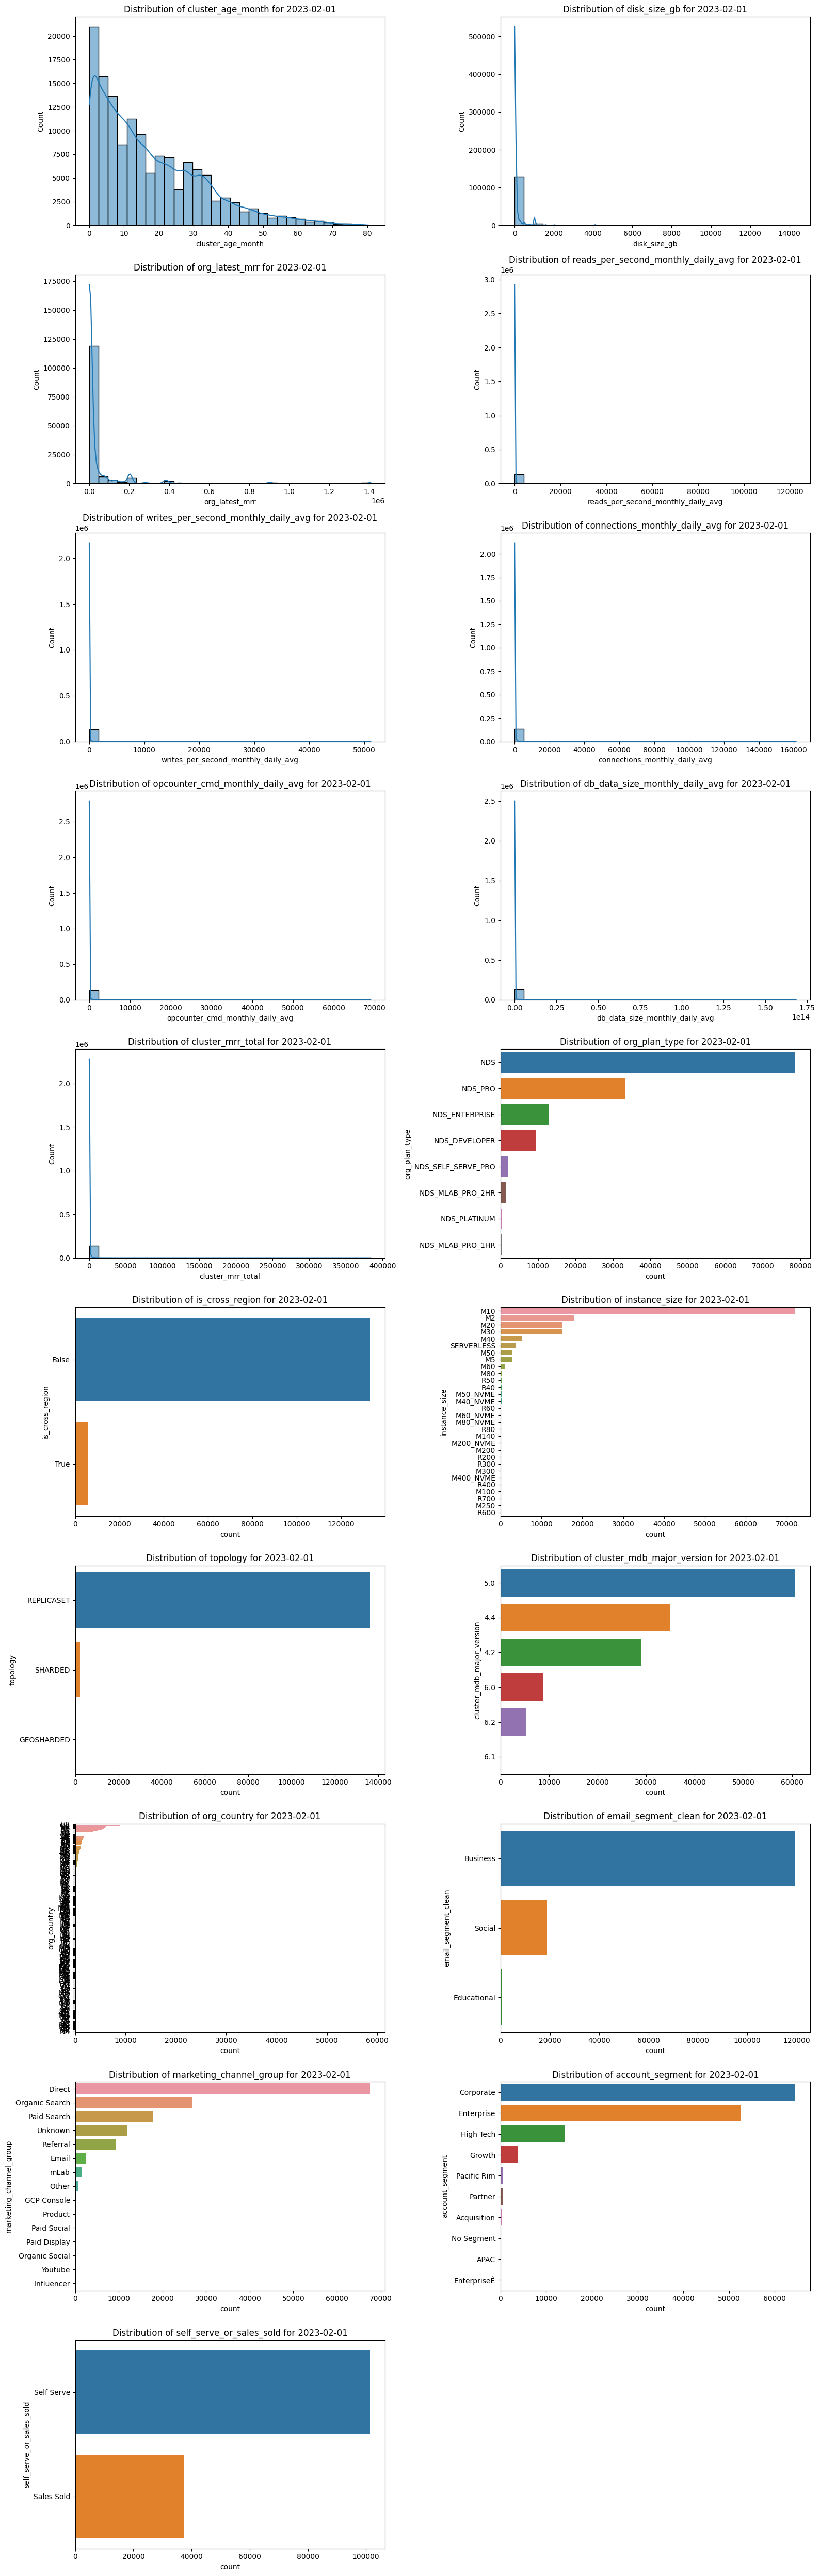

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert 'ds' to datetime format
data["ds"] = pd.to_datetime(data["ds"])

# Filtering the data for 'ds = 2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Update the lists of features as per your specification
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Calculate the number of plots needed
num_plots = len(categorical_features) + len(numerical_features)
cols = 2
rows = num_plots // cols + (num_plots % cols > 0)

plt.figure(
    figsize=(16, max(5 * rows, 20))
)  # Adjusting the figure size based on the number of plots

# Plotting histograms for the new set of numerical variables
for i, var in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(filtered_data[var], kde=True, bins=30)
    plt.title(f"Distribution of {var} for 2023-02-01")

# Plotting bar plots for the new set of categorical variables
for j, var in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(rows, cols, j)
    order = filtered_data[var].value_counts().index
    sns.countplot(y=var, data=filtered_data, order=order)
    plt.title(f"Distribution of {var} for 2023-02-01")

plt.tight_layout()
plt.show()

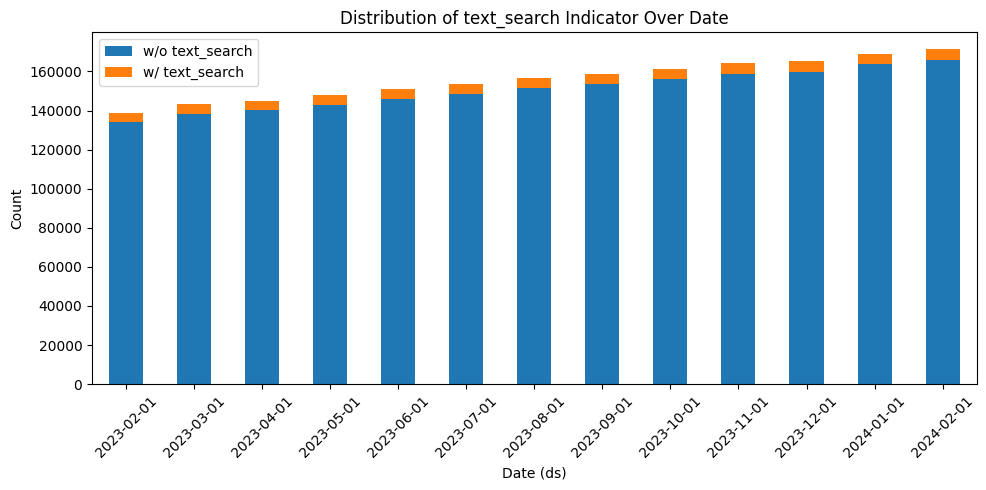

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution of the product_ind target variable over the 'ds' date
target_distribution_over_ds = (
    data.groupby("ds")[product_ind].value_counts().unstack(fill_value=0)
)

# Convert the index (which is 'ds') to datetime objects first
target_distribution_over_ds.index = pd.to_datetime(target_distribution_over_ds.index)

# Now, you can safely extract the date part only to ignore the time part
target_distribution_over_ds.index = target_distribution_over_ds.index.date

# Use the parameter in the plot
target_distribution_over_ds.plot(kind="bar", stacked=True, figsize=(10, 5))

# Integrate the product_title into the title and legend labels
plt.title(f"Distribution of {product} Indicator Over Date")
plt.xlabel("Date (ds)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(
    labels=[f"w/o {product}", f"w/ {product}"],
    loc="upper left",
)
plt.tight_layout()
plt.grid(False)
plt.show()


# Matching Process

### Assigning Treatment & Control

In [11]:
import pandas as pd

# Create a copy of the original DataFrame
data = df_raw.copy()

data["ds"] = pd.to_datetime(data["ds"])
data[product_ds] = pd.to_datetime(data[product_ds])

# Determine the earliest product_ds date for each cluster
earliest_product = data.groupby("cluster_id")[product_ds].min().reset_index()


def assign_group(row):
    # Convert string dates to datetime objects for comparison
    start_date = pd.to_datetime("2023-02-01")
    end_date = pd.to_datetime("2023-12-31")

    if pd.isnull(row[product_ds]):
        return "control group"
    elif row[product_ds] < start_date or row[product_ds] > end_date:
        return "not eligible"
    elif start_date <= row[product_ds] <= end_date:
        return "treatment group"
    else:
        return "control group"


earliest_product["group_assignment"] = earliest_product.apply(
    assign_group, axis=1
)


# Merge the group assignment back to the original dataset
data = pd.merge(
    data,
    earliest_product[["cluster_id", "group_assignment"]],
    on="cluster_id",
    how="left",
)

In [12]:
# Ensure product_ds is in datetime format
data[product_ds] = pd.to_datetime(data[product_ds], errors="coerce")

# 1. Count of all unique clusters
total_unique_clusters = data["cluster_id"].nunique()

# 2. Count of unique clusters with product_ind equal to 1
unique_clusters_product_ind_1 = data[data[product_ind] == 1][
    "cluster_id"
].nunique()

# 3. Count of unique clusters with product_ds >= '2023-02-01' and <= '2023-12-31'
unique_clusters_product_ds = data[
    (data[product_ds] >= "2023-02-01") & (data[product_ds] <= "2023-12-31")
]["cluster_id"].nunique()

# 4. Count of unique clusters in each 'group_assignment'
unique_clusters_per_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()

# Display the results with dynamic column names
print(f"Total number of unique clusters: {total_unique_clusters}")
print(
    f"Unique clusters with '{product_ind}' = 1: {unique_clusters_product_ind_1}"
)
print(
    f"Unique clusters with '{product_ds}' >= '2023-02-01' and < '2023-12-31': {unique_clusters_product_ds}"
)
print("Unique clusters in each 'group_assignment':")
for group_assignment, count in unique_clusters_per_group_assignment.items():
    print(f"  - {group_assignment}: {count}")

Total number of unique clusters: 247167
Unique clusters with 'text_search_ind' = 1: 6080
Unique clusters with 'text_search_ds' >= '2023-02-01' and < '2023-12-31': 2739
Unique clusters in each 'group_assignment':
  - control group: 241087
  - not eligible: 3341
  - treatment group: 2739


In [13]:
import pandas as pd
import numpy as np

# Convert 'ds' and product_ds to datetime format in one step
data[["ds", product_ds]] = data[["ds", product_ds]].apply(pd.to_datetime)

# Define the filtering conditions in advance to improve readability
eligible = data["group_assignment"] != "not eligible"
date_range = (data["ds"] >= "2023-02-01") & (data["ds"] <= "2023-12-31")
not_deleted = data["is_deleted"] != True  # Add not deleted filter
mrr_greater_than_zero = data["cluster_mrr_total"] > 0  # Add MRR > 0 filter

# Apply all filtering conditions
data = data[eligible & date_range & not_deleted & mrr_greater_than_zero]

# Use a single line to create 'same_month_indicator' by comparing years and months directly
data["same_month_indicator"] = (
    (data["ds"].dt.to_period("M") == data[product_ds].dt.to_period("M"))
).astype(int)

# Convert 'ds' to a 'month_year' period format for monthly analysis directly
data["month_year"] = data["ds"].dt.to_period("M")

# Set 'product_month_indicator' using period comparison for simplicity
data["product_month_indicator"] = (
    data[product_ds].notnull()
    & (data[product_ds].dt.to_period("M") <= data["month_year"])
).astype(int)

In [14]:
# Group by 'product_ind' and count unique 'cluster_id's
unique_clusters_product_ind = data.groupby(product_ind)["cluster_id"].nunique()

# Use the dynamically generated 'product_ind' in the print statement
print(f"Unique clusters by {product_ind}:\n", unique_clusters_product_ind)

# Group by 'same_month_indicator' and count unique 'cluster_id's
unique_clusters_same_month_indicator = data.groupby("same_month_indicator")[
    "cluster_id"
].nunique()
print(
    "\nUnique clusters by same_month_indicator:\n", unique_clusters_same_month_indicator
)

# Group by 'group_assignment' and count unique 'cluster_id's
unique_clusters_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()
print("\nUnique clusters by group_assignment:\n", unique_clusters_group_assignment)

Unique clusters by text_search_ind:
 text_search_ind
0    222007
1      2739
Name: cluster_id, dtype: int64

Unique clusters by same_month_indicator:
 same_month_indicator
0    224735
1      2726
Name: cluster_id, dtype: int64

Unique clusters by group_assignment:
 group_assignment
control group      222007
treatment group      2739
Name: cluster_id, dtype: int64


### Check Missing Values

In [15]:
import pandas as pd

# Convert 'ds' column to datetime format
data["ds"] = pd.to_datetime(data["ds"])

# Filter data for a specific date
filtered_data = data[data["ds"] == "2023-02-01"]

# Count missing values by 'group_assignment'
missing_values = filtered_data.isnull().groupby(filtered_data["group_assignment"]).sum()

# Add a row to show total missing values for each column
missing_values.loc['Total Missing'] = missing_values.sum()

# Calculate and print the total number of unique clusters per 'group_assignment'
total_clusters = filtered_data.groupby("group_assignment")["cluster_id"].nunique()

# Print the missing values table
missing_values

,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,org_latest_mrr,email_segment_clean,marketing_channel_group,channel_group,channel_type,account_segment,atlas_org_region,pw_language,first_cluster_instance_size,first_cluster_instance_size_group,self_serve_or_sales_sold,atlas_org_registration_date,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,product_month_indicator
group_assignment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control group,0,0,0,0,0,0,0,0,0,0,0,0,3584,0,0,134091,0,0,0,0,0,0,68723,3612,0,0,0,0,0,0,0,0,0,0,0,0,0,15525,0,0,0,0,0,0,0,0,0,0,60914,60914,...,132,0,0,0,0,2018,95,119143,1,1,0,0,2590,24924,3964,3969,3959,3959,24933,3959,24924,3964,3969,3959,3959,24933,3959,0,134091,0,134032,0,133214,0,133389,0,130032,0,129200,0,132384,0,132545,0,133989,0,0,0,0,0
treatment group,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1795,0,0,0,0,0,0,910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,0,0,0,0,0,0,0,0,0,0,562,562,...,1,0,0,0,0,21,0,1489,0,0,0,0,35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1727,0,1732,0,1779,0,1505,0,1567,0,1704,0,1733,0,1790,0,0,0,0,0
Total Missing,0,0,0,0,0,0,0,0,0,0,0,0,3584,0,0,135886,0,0,0,0,0,0,69633,3612,0,0,0,0,0,0,0,0,0,0,0,0,0,15674,0,0,0,0,0,0,0,0,0,0,61476,61476,...,133,0,0,0,0,2039,95,120632,1,1,0,0,2625,24925,3965,3970,3960,3960,24934,3960,24925,3965,3970,3960,3960,24934,3960,0,134091,0,135759,0,134946,0,135168,0,131537,0,130767,0,134088,0,134278,0,135779,0,0,0,0,0


In [16]:
# Define features and target
features = [
    "cluster_age_month",
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "disk_size_gb",
    "org_country",
    "org_latest_mrr",
    "email_segment_clean",
    "marketing_channel_group",
    "self_serve_or_sales_sold",
    "reads_per_second_monthly_daily_avg",
]

# Ensure 'ds' column is in datetime format (if not already done)
data["ds"] = pd.to_datetime(data["ds"])

# Filter the DataFrame for rows where 'ds' equals '2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Calculate the percentage of rows with any missing value, grouped by 'group_assignment'
# Only considering the filtered data for '2023-02-01'
percentage_missing = (
    filtered_data[features]
    .isnull()
    .any(axis=1)
    .groupby(filtered_data["group_assignment"])
    .mean()
    * 100
)

# Format the output with a '%' sign
formatted_percentage_missing = percentage_missing.apply(lambda x: f"{x:.2f}%")

# Display the formatted percentages
formatted_percentage_missing

group_assignment
control group      3.06%
treatment group    0.11%
dtype: object

### Logit Regression & Feature Importance

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    auc,
    cohen_kappa_score,
    matthews_corrcoef,
    log_loss,
)
from sklearn.pipeline import make_pipeline

# Filter dataset for ds='2023-12-01'
data_filtered = data[data["ds"] == "2023-12-01"]

X = data_filtered[features]
y = data_filtered["product_month_indicator"]

# Drop rows with any null values in the features
X = X.dropna()
y = y[X.index]

# Apply Label Encoding to categorical features
le = LabelEncoder()
for column in X.select_dtypes(include=["object"]).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Address imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression classifier within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[
    :, 1
]  # Probability estimates for the positive class

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print additional evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Cohen’s Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Log Loss: {logloss:.4f}")

# Extract the logistic regression model from the pipeline
logistic_regression_model = model.named_steps["logisticregression"]

# Get the coefficients from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})

# Calculate the absolute values of coefficients to determine their impact regardless of direction (positive/negative)
feature_importance["Absolute_Coefficient"] = feature_importance["Coefficient"].abs()

# Sort the features by their absolute coefficient values in descending order
feature_importance = feature_importance.sort_values(
    by="Absolute_Coefficient", ascending=False
)

# Display the sorted feature importance
feature_importance

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     31010
           1       0.02      0.55      0.05       508

    accuracy                           0.65     31518
   macro avg       0.51      0.60      0.42     31518
weighted avg       0.97      0.65      0.77     31518

[[20142 10868]
 [  230   278]]
ROC-AUC Score: 0.6375
Precision-Recall AUC: 0.0301
Cohen’s Kappa: 0.0174
Matthews Correlation Coefficient: 0.0518
Log Loss: 0.6216


,Feature,Coefficient,Absolute_Coefficient
8,org_latest_mrr,-0.82,0.82
3,instance_size,0.43,0.43
1,org_plan_type,-0.38,0.38
11,self_serve_or_sales_sold,-0.31,0.31
4,topology,-0.30,0.30
0,cluster_age_month,-0.28,0.28
9,email_segment_clean,-0.26,0.26
2,is_cross_region,0.22,0.22
6,disk_size_gb,0.13,0.13
10,marketing_channel_group,-0.08,0.08


### Exact + Fuzzy Match

In [18]:
import pandas as pd
import numpy as np

base_match_variable = "month_year"
final_refine_variable = "cluster_mrr_total"
match_order = feature_importance['Feature'].head(6).tolist()
data.loc[:, "pair_index"] = pd.NA
global_pair_index = 0

unique_months = data[base_match_variable].drop_duplicates()

for month in unique_months:
    month_data = data[data[base_match_variable] == month].copy()

    # Remove outliers for 'cluster_mrr_total'
    Q1 = month_data[final_refine_variable].quantile(0.25)
    Q3 = month_data[final_refine_variable].quantile(0.75)
    IQR = Q3 - Q1
    # Keep rows that are not considered outliers
    month_data = month_data[
        (month_data[final_refine_variable] >= (Q1 - 1.5 * IQR))
        & (month_data[final_refine_variable] <= (Q3 + 1.5 * IQR))
    ]

    treatment_data = month_data[
        (month_data["group_assignment"] == "treatment group")
        & (month_data["same_month_indicator"] == 1)
    ]
    control_data = month_data[month_data["group_assignment"] == "control group"].copy()

    for t_index, t_row in treatment_data.iterrows():
        potential_matches = control_data.copy()
        match_found = False  # Flag to indicate if a match has been found

        for feature in match_order:
            initial_potential_matches = (
                potential_matches.copy()
            )  # Keep a copy before filtering

            if feature in ["org_latest_mrr", "cluster_age_month"]:  # Numerical features
                match_value = t_row[feature]
                potential_matches = potential_matches[
                    (potential_matches[feature] >= match_value * 0.9)
                    & (potential_matches[feature] <= match_value * 1.1)
                ]
            else:  # Categorical features
                potential_matches = potential_matches[
                    potential_matches[feature] == t_row[feature]
                ]

            if potential_matches.empty:
                potential_matches = initial_potential_matches  # Restore before filtering if no match found
            else:
                match_found = True  # Update flag when matches are found

            if len(potential_matches) < 3:
                break

        # If matches are found for any feature
        if match_found and not potential_matches.empty:
            potential_matches["difference"] = abs(
                potential_matches[final_refine_variable] - t_row[final_refine_variable]
            )
            closest_match_index = potential_matches["difference"].idxmin()

            # Update 'pair_index' for both treatment and matched control
            data.loc[t_index, "pair_index"] = global_pair_index
            data.loc[closest_match_index, "pair_index"] = global_pair_index
            global_pair_index += 1  # Increment for the next pair

            # Remove the matched control to avoid reusing
            control_data = control_data.drop(closest_match_index)

# Convert 'pair_index' to Int64 and filter unmatched entries
data["pair_index"] = data["pair_index"].astype("Int64")
final_matched_dataset = data.dropna(subset=["pair_index"])

### Balance Check

In [19]:
# Calculate unique clusters in the treatment group from original data
unique_clusters_treatment_original = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
print(f"Unique clusters in treatment: {unique_clusters_treatment_original}")

# Calculate unique clusters in both groups from final_matched_dataset
unique_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
unique_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].nunique()
print(
    f"Unique clusters in treatment: {unique_clusters_treatment_final}, control: {unique_clusters_control_final}"
)

# Calculate total cluster counts in both groups
total_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].count()
total_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].count()
print(
    f"Total clusters in treatment: {total_clusters_treatment_final}, control: {total_clusters_control_final}"
)

Unique clusters in treatment: 1610
Unique clusters in treatment: 1610, control: 1588
Total clusters in treatment: 1610, control: 1610


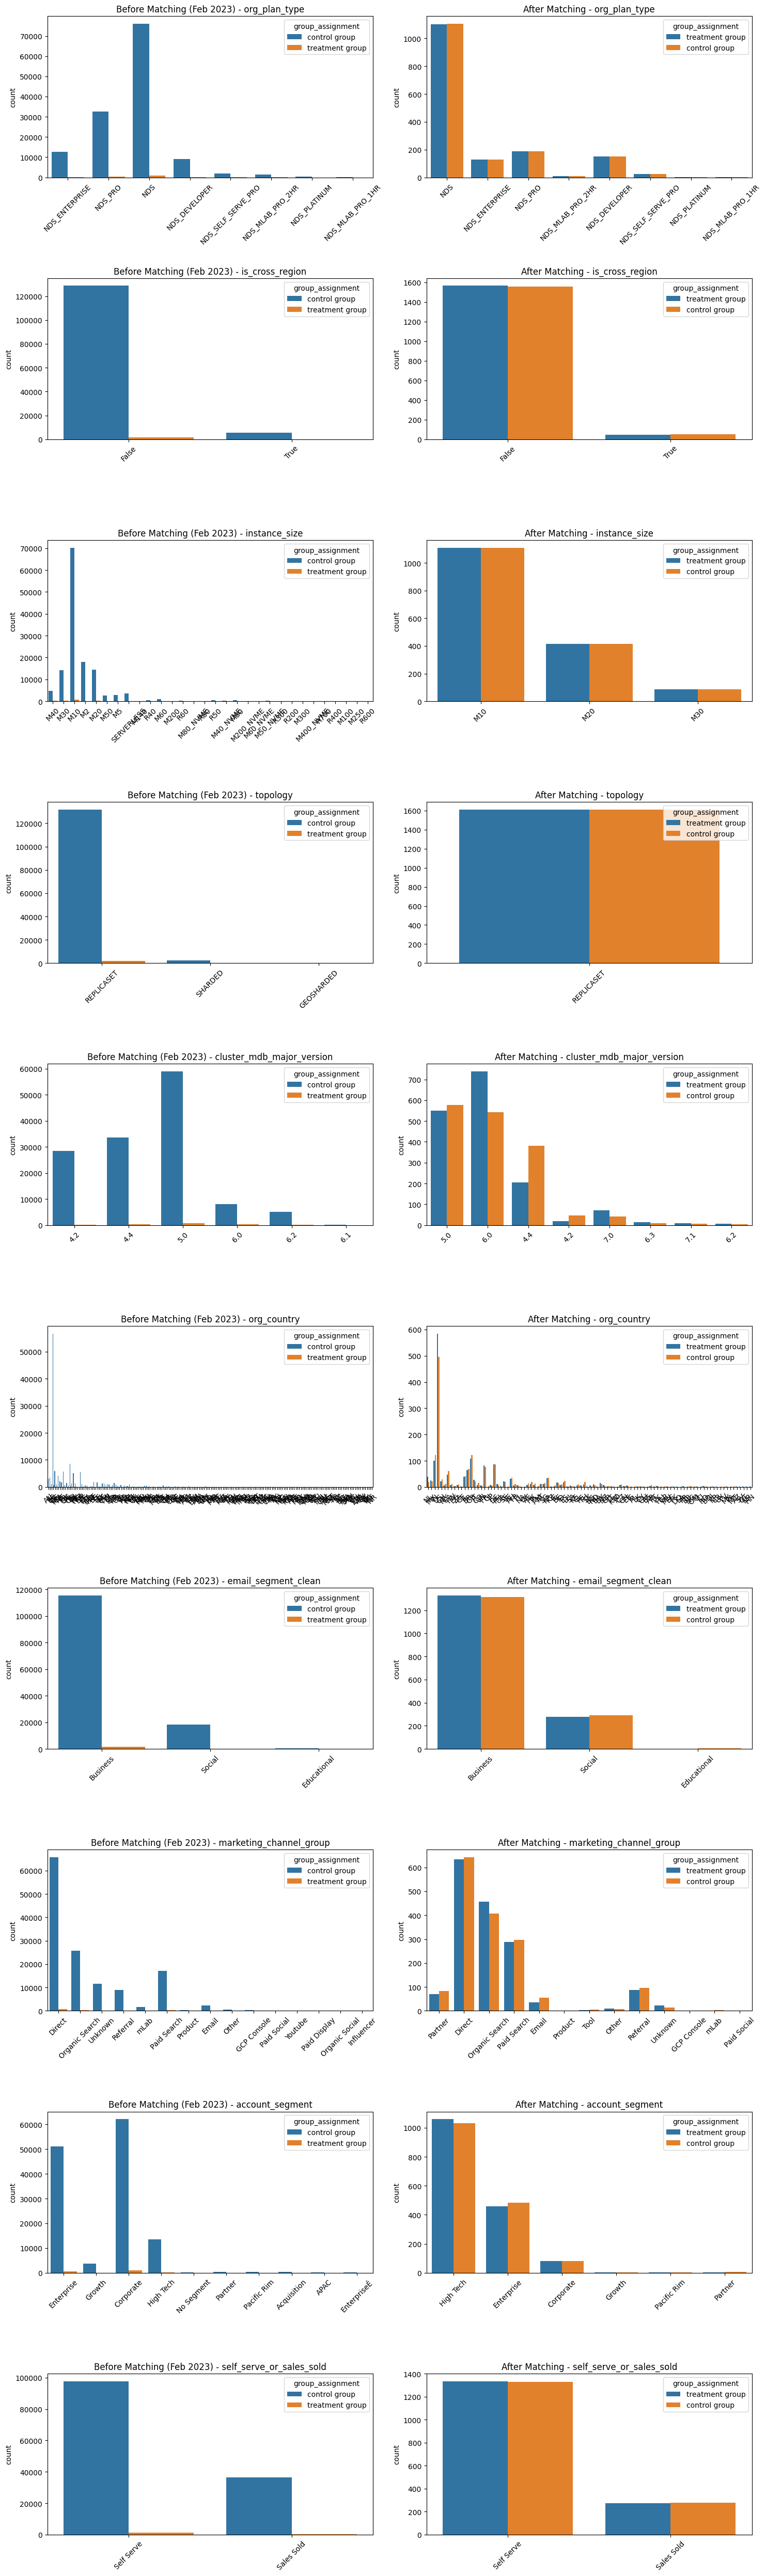

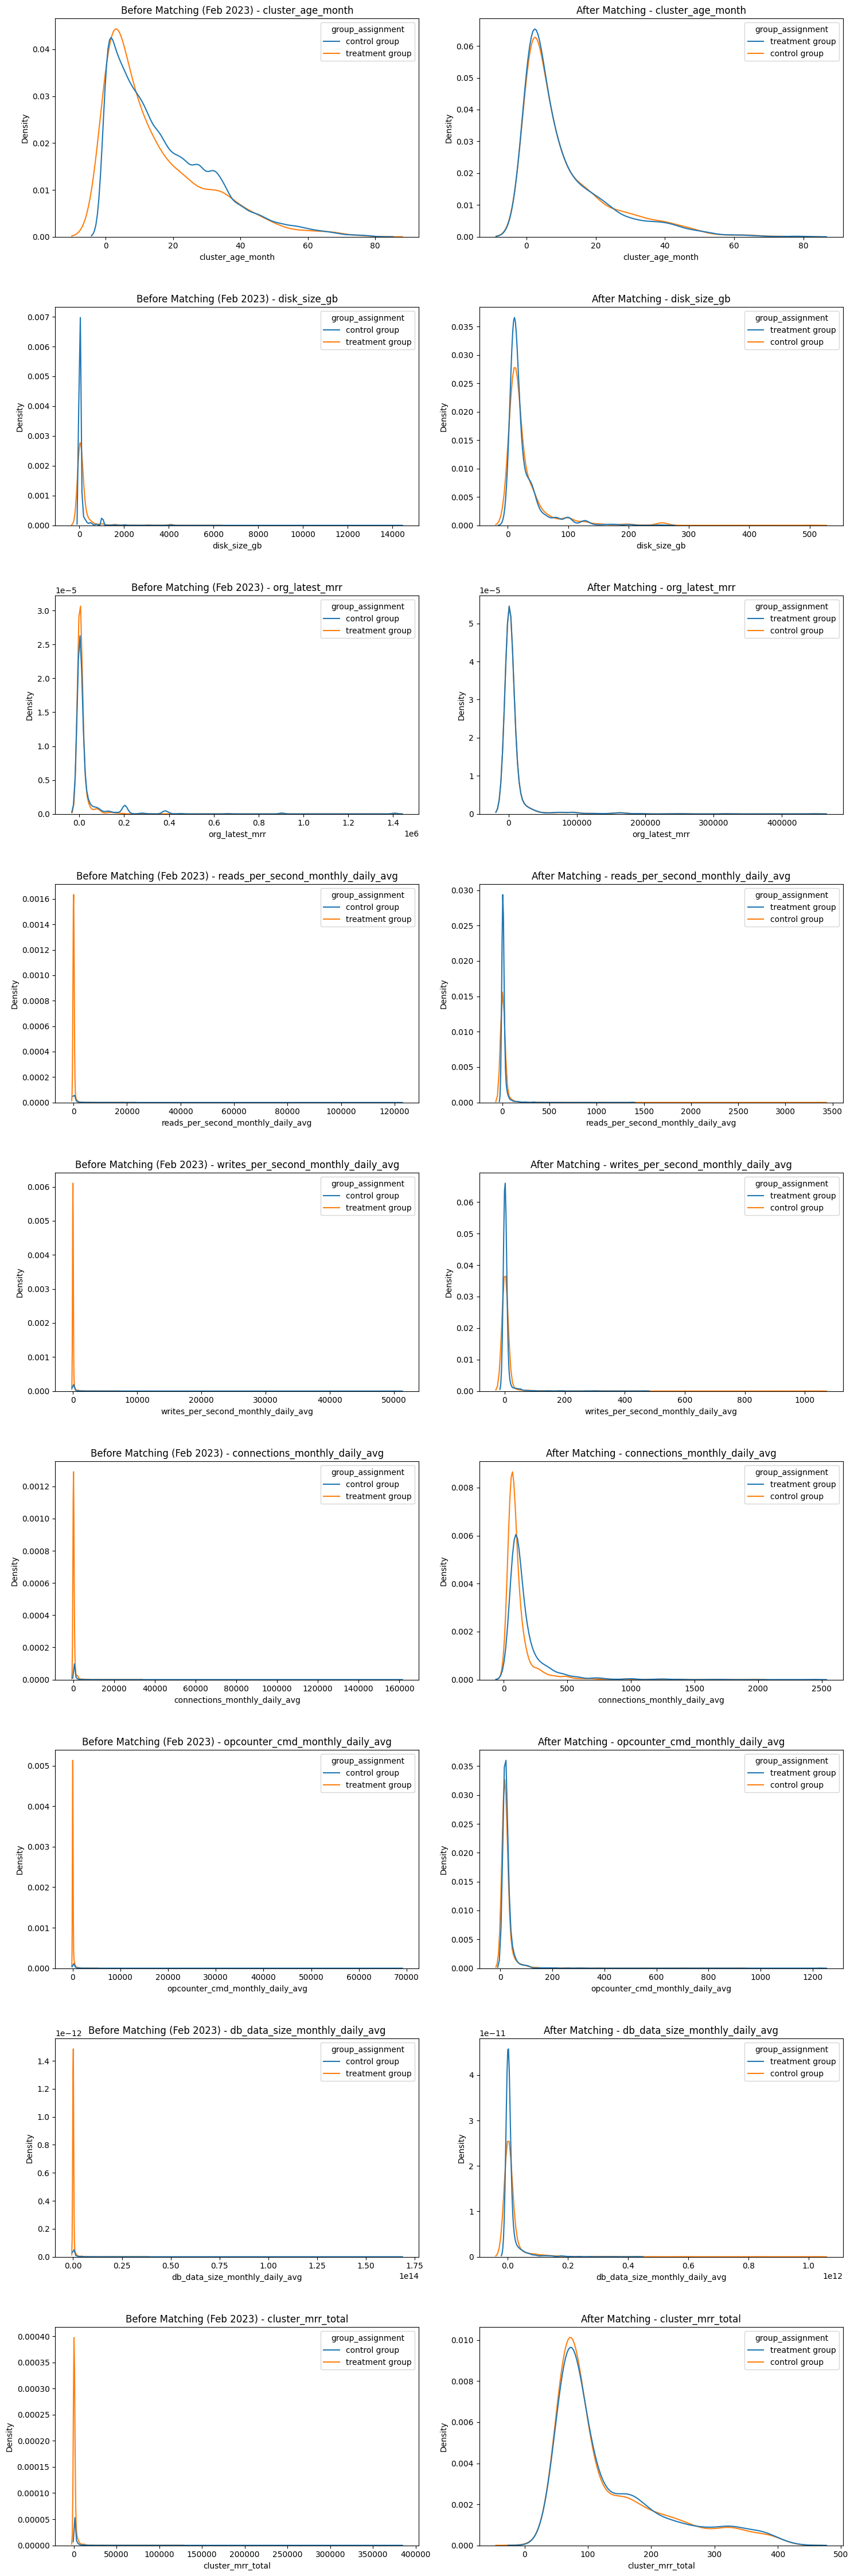

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numerical features
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Filter data for Feb 2023
feb_2023_data = data[
    (data["ds"].dt.year == 2023)
    & (data["ds"].dt.month == 2)
    & (
        (data["group_assignment"] == "treatment group")
        | (data["group_assignment"] == "control group")
    )
]

# Plotting categorical features with count plots
fig, axes = plt.subplots(
    len(categorical_features),
    2,
    figsize=(15, 5 * len(categorical_features)),
    squeeze=False,
)
for i, feature in enumerate(categorical_features):
    # Before Matching - Feb 2023 Data
    sns.countplot(x=feature, hue="group_assignment", data=feb_2023_data, ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")
    axes[i, 0].tick_params(axis="x", rotation=45)
    axes[i, 0].set_xlabel("")  # Remove x-label to save space

    # After Matching
    sns.countplot(
        x=feature, hue="group_assignment", data=final_matched_dataset, ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"After Matching - {feature}")
    axes[i, 1].tick_params(axis="x", rotation=45)
    axes[i, 1].set_xlabel("")  # Remove x-label to save space

plt.tight_layout(h_pad=3)  # Adjust vertical spacing to prevent overlap
plt.show()

# Now, plotting numerical features with KDE plots
fig, axes = plt.subplots(
    len(numerical_features), 2, figsize=(15, 5 * len(numerical_features)), squeeze=False
)
for i, feature in enumerate(numerical_features):
    # Before Matching - Feb 2023 Data
    sns.kdeplot(
        data=feb_2023_data,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 0],
        common_norm=False,
    )
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")

    # After Matching
    sns.kdeplot(
        data=final_matched_dataset,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 1],
        common_norm=False,
    )
    axes[i, 1].set_title(f"After Matching - {feature}")

plt.tight_layout(h_pad=3)
plt.show()

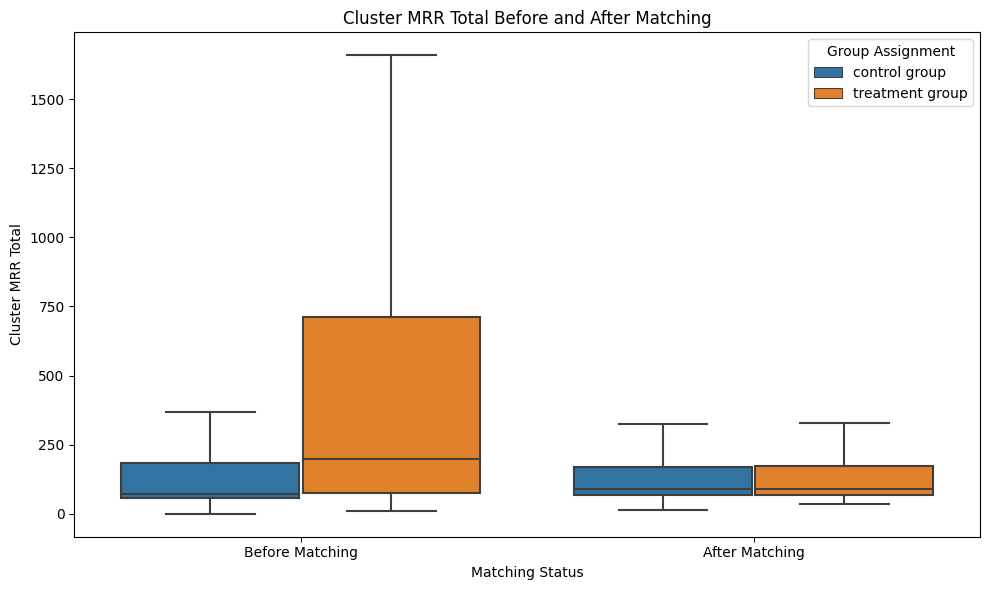

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for '2023-02-01' in 'data' for before matching, and use 'final_matched_dataset' for after matching
before_matching_data = data[data["ds"] == "2023-02-01"][
    ["group_assignment", "cluster_mrr_total"]
].copy()
before_matching_data["Match_Status"] = "Before Matching"

after_matching_data = final_matched_dataset[
    ["group_assignment", "cluster_mrr_total"]
].copy()
after_matching_data["Match_Status"] = "After Matching"

# Combine and plot without outliers
combined_data = pd.concat([before_matching_data, after_matching_data])
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Match_Status",
    y="cluster_mrr_total",
    hue="group_assignment",
    data=combined_data,
    showfliers=False,
)
plt.title("Cluster MRR Total Before and After Matching")
plt.xlabel("Matching Status")
plt.ylabel("Cluster MRR Total")
plt.legend(title="Group Assignment")
plt.tight_layout()
plt.show()

# Analysis

### Data Manipulation

In [22]:
import pandas as pd
from datetime import datetime

# Copy df_raw to avoid altering the original DataFrame
data = df_raw.copy()

# Ensure 'ds' columns in the copied data and final_matched_dataset are datetime objects
data["ds"] = pd.to_datetime(data["ds"])
final_matched_dataset["ds"] = pd.to_datetime(final_matched_dataset["ds"])

# Merge final_matched_dataset with the filtered copied data on 'cluster_id'
merged_data = pd.merge(
    final_matched_dataset[["cluster_id", "ds"]],
    data[["cluster_id", "ds", "cluster_mrr_total"]],
    on="cluster_id",
    how="left",
    suffixes=("_final", "_raw"),
)

# Filter to include records where 'ds_raw' is equal to or after 'ds_final'
filtered_data = merged_data[merged_data["ds_raw"] >= merged_data["ds_final"]].copy()

# Calculate the month difference
filtered_data["month_diff"] = (
    (filtered_data["ds_raw"].dt.year - filtered_data["ds_final"].dt.year) * 12
    + filtered_data["ds_raw"].dt.month
    - filtered_data["ds_final"].dt.month
)

# Pivot the table based on 'month_diff' for MRR totals
pivot_mrr_totals = filtered_data.pivot_table(
    index="cluster_id",
    columns="month_diff",
    values="cluster_mrr_total",
    aggfunc="first",
).reset_index()

# Flatten the columns and rename them to "Month X"
pivot_mrr_totals.columns = ["cluster_id"] + [
    f"Month {col}" if isinstance(col, int) else col
    for col in pivot_mrr_totals.columns[1:]
]

# Merge the pivot table back into final_matched_dataset
final_dataset_with_monthly_mrr = pd.merge(
    final_matched_dataset, pivot_mrr_totals, on="cluster_id", how="left"
)

# Fixed date for imputation
fixed_date = datetime(2024, 2, 1)
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]


# Function to impute MRR values
def impute_mrr(row):
    for col in mrr_columns:
        month_num = int(col.split(" ")[1]) if "Month" in col else 0
        month_diff = (
            (fixed_date.year - row["ds"].year) * 12 + fixed_date.month - row["ds"].month
        )
        if pd.isnull(row[col]) and month_num <= month_diff:
            row[col] = 0
    return row


# Apply the imputation row-wise
final_dataset_with_monthly_mrr = final_dataset_with_monthly_mrr.apply(
    impute_mrr, axis=1
)

# Display the result
final_dataset_with_monthly_mrr.head()

,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,product_month_indicator,pair_index,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
0,67.42,603818fc7d7cb8796a0c4737,Direct impact,NDS,603818fccb6b4d776b44f939,DI-JOBS,NDS,False,6217228b49cac56186c84fe7,DB-01,atlas-pyzid2,db-01,[6217254c939b2f3515b072b3],2022-02-24 06:15:39.910,17.00,None,[GCP],1,[EUROPE_WEST_4],1,False,M10,G1,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.19,10.00,False,False,True,SNAPSHOTS,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,None,...,115.80,19.08,2.75,0.36,11.58,1196099438.63,6.29,116.13,19.00,2.85,0.33,9.79,1196393519.32,2023-07-01,2023-07-09,1,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,treatment group,1,2023-07,1,178,67.42,67.51,80.10,85.95,100.86,90.44,85.82,85.00,NaN,NaN,NaN,NaN,NaN
1,83.52,62f54492989d6156528df7df,Galileo,NDS,6349cd8ff1cb235fec9afbed,prd,NDS,False,63518d5f848e420e0df1dc28,prd,atlas-30nxr4,prd,[63518fe6a19e826969d7b81b],2022-10-20 18:03:11.766,9.00,None,[AWS],1,[US_EAST_1],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.19,10.00,False,False,True,SNAPSHOTS,True,True,True,3.00,0.00,0.00,0.00,False,secondary,IDLE,3000.00,Gp3,...,159.08,26.16,12.15,1.42,9.20,2119886838.07,3.16,160.45,26.13,12.27,1.43,9.39,2120062565.10,2023-07-01,2023-07-02,1,None,0,None,0,None,0,2023-06-23,1,None,0,None,0,None,0,None,0,treatment group,1,2023-07,1,179,83.52,412.14,255.28,101.34,102.34,106.52,110.20,127.92,NaN,NaN,NaN,NaN,NaN
2,135.40,62c90cd113271e5df30be041,Yogesh's Org - 2022-07-09,NDS,62c90cd113271e5df30be049,Project 0,NDS,False,62c90e6caa455314ba1e86b3,YolDB,atlas-agtx4f,yoldb,[62c910168250a43e11a5dc94],2022-07-09 05:13:16.176,17.00,None,[AWS],1,[AP_SOUTH_1],1,False,M20,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.23,10.00,False,False,True,SNAPSHOTS,True,True,True,3.00,0.00,0.00,0.00,False,secondary,IDLE,3000.00,Gp3,...,71.07,16.81,5.58,0.20,6.15,1178014334.67,2.72,72.84,16.55,3.07,0.21,1.49,1178068092.32,2023-12-01,NaT,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,control group,0,2023-12,0,1001,135.40,83.29,69.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,346.25,5d74c075014b769c4bf0248f,Qureos,NDS,625d092c9fb94e62e4bef8cf,QureosAWS,NDS,False,625d1195c6f9c33040b93e1d,Stg,atlas-ab0557,stg,[625d13513ee8aa23590197a8],2022-04-18 07:21:57.733,20.00,None,[AWS],1,[EU_WEST_1],1,Fa

### Average MRR

In [23]:
# get cluster id in  6405a90231367347d4bf73b4, 6433c0af3857ca4a99f47284 and 63695e644d44106a7bb6eb27, 64b97bb630aa85408cf83c16 from final_dataset_with_monthly_mrr
final_dataset_with_monthly_mrr[final_dataset_with_monthly_mrr['cluster_id'].isin(['6405a90231367347d4bf73b4', '6433c0af3857ca4a99f47284', '63695e644d44106a7bb6eb27', '64b97bb630aa85408cf83c16'])]


# e.g. M10 to M80, show some examples


,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,product_month_indicator,pair_index,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12


In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import sem, t

# # Dynamically generate MRR columns, ensuring only month columns 0 through 11 are selected
# mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
# mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

# def calculate_means_and_ci(data, confidence=0.95):
#     n = len(data)
#     mean = np.mean(data)
#     std_err = sem(data) if n > 1 else 0
#     margin = std_err * t.ppf((1 + confidence) / 2, n - 1)
#     return mean, mean - margin, mean + margin


# original_group_colors = {"treatment group": "red", "control group": "skyblue"}
# group_rename = {
#     "treatment group": "Clusters w/ Product",
#     "control group": "Clusters w/o Product",
# }

# plt.figure(figsize=(12, 6))

# for original_group, color in original_group_colors.items():
#     new_group_name = group_rename[original_group]
#     means = []
#     lower_cis = []
#     upper_cis = []
#     for month in mrr_columns:  # Loop through the filtered/selected month columns
#         month_data = final_dataset_with_monthly_mrr[
#             (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
#             & final_dataset_with_monthly_mrr[month].notna()
#         ][month]
#         mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
#         means.append(mean)
#         lower_cis.append(lower_ci)
#         upper_cis.append(upper_ci)

#     plt.plot(mrr_columns, means, marker="o", label=new_group_name, color=color)
#     plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

#     for i, mean in enumerate(means):
#         plt.text(
#             mrr_columns[i],
#             mean + (max(upper_cis) - min(lower_cis)) * 0.05,
#             f"${mean:.0f}",
#             ha="center",
#             va="bottom",
#             fontsize=8,
#             color=color,
#         )

# plt.title("Monthly Average MRR Since Clusters First Acquired the Product")
# plt.xlabel("Month")
# plt.ylabel("Average MRR ($)")
# plt.legend(loc="upper left")
# plt.ylim(bottom=0)
# plt.tight_layout()
# plt.show()

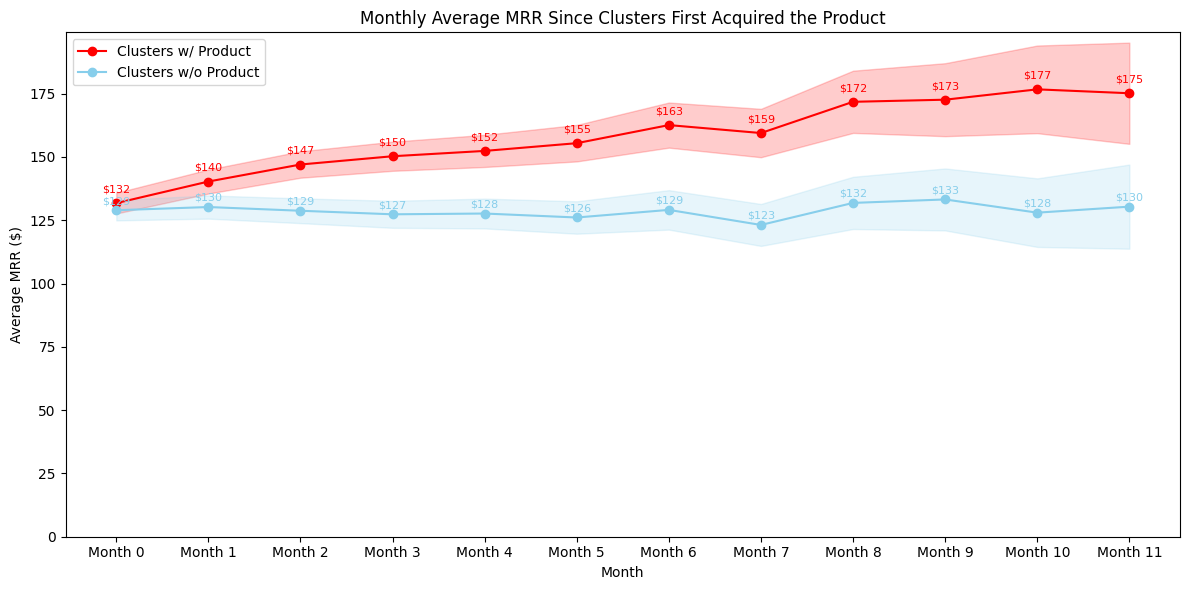

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t, mstats

# Dynamically generate MRR columns, ensuring only month columns 0 through 11 are selected
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

def calculate_means_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data) if n > 1 else 0
    margin = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - margin, mean + margin

def winsorize_by_month(data, mrr_columns):
    for month in mrr_columns:
        # Select non-zero and non-null values for winsorization
        valid_values = data[(data[month] != 0) & (data[month].notna())][month]
        winsorized_values = mstats.winsorize(valid_values, limits=[0.05, 0.05])  # Adjust limits as needed
        
        # Update the dataframe with winsorized values for non-zero and non-null entries
        data.loc[(data[month] != 0) & (data[month].notna()), month] = winsorized_values
    
    return data

# Apply winsorization to the dataset
final_dataset_with_monthly_mrr = winsorize_by_month(final_dataset_with_monthly_mrr, mrr_columns)

original_group_colors = {"treatment group": "red", "control group": "skyblue"}
group_rename = {
    "treatment group": "Clusters w/ Product",
    "control group": "Clusters w/o Product",
}

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    new_group_name = group_rename[original_group]
    means = []
    lower_cis = []
    upper_cis = []
    for month in mrr_columns:  # Loop through the filtered/selected month columns
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]
        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)

    plt.plot(mrr_columns, means, marker="o", label=new_group_name, color=color)
    plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

    for i, mean in enumerate(means):
        plt.text(
            mrr_columns[i],
            mean + (max(upper_cis) - min(lower_cis)) * 0.05,
            f"${mean:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Monthly Average MRR Since Clusters First Acquired the Product")
plt.xlabel("Month")
plt.ylabel("Average MRR ($)")
plt.legend(loc="upper left")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


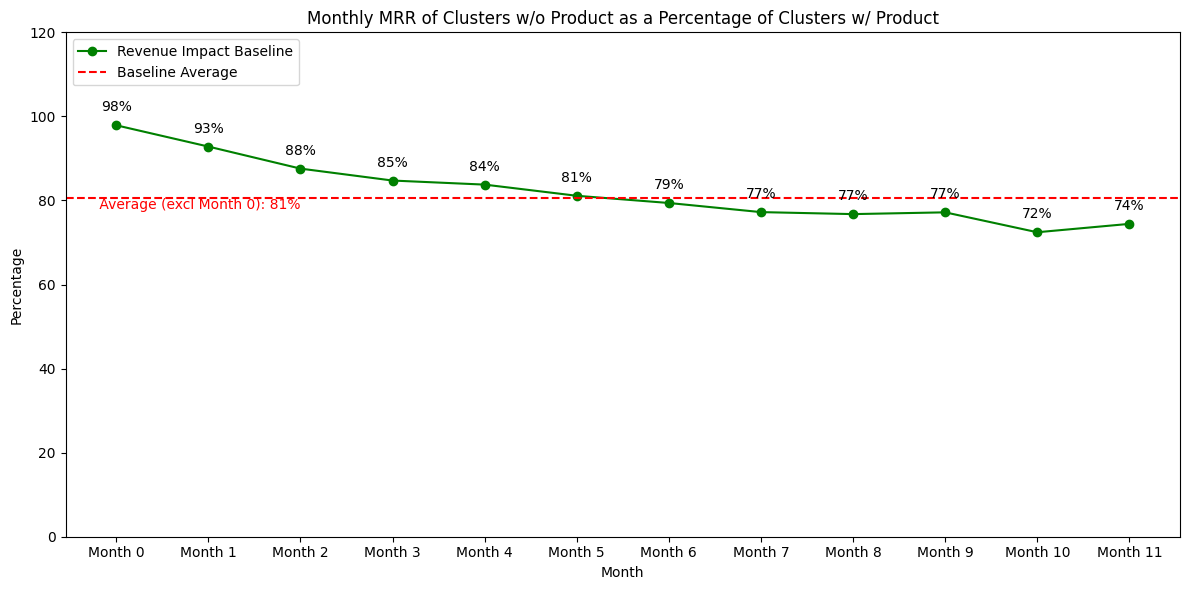

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

plt.figure(figsize=(12, 6))

group_means = {}

for original_group in ["treatment group", "control group"]:
    means = []
    lower_cis = []
    upper_cis = []
    for month in mrr_columns:
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]
        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)
    group_means[original_group] = (means, lower_cis, upper_cis)

# Calculate percentage of control group mean MRR to treatment group mean MRR
treatment_means, _, _ = group_means["treatment group"]
control_means, _, _ = group_means["control group"]
percentage_means = [(control / treatment) * 100 if treatment else 0 for control, treatment in zip(control_means, treatment_means)]

# Calculate the average of the percentage means
average_percentage_mean = np.mean(percentage_means[1:])

# Plot the percentage line in green
plt.plot(mrr_columns, percentage_means, marker="o", color="green", label="Revenue Impact Baseline")

# Adding data labels for the percentage
for i, txt in enumerate(percentage_means):
    plt.annotate(f"{txt:.0f}%", (mrr_columns[i], percentage_means[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot the average of the percentage means as a horizontal line
plt.axhline(y=average_percentage_mean, color='r', linestyle='--', label=f"Baseline Average")

# Add a label for the average line
# Adjust the x position as needed to place the label at the desired location on your chart
x_position_for_average_label = len(mrr_columns) - 10  # This puts it at the last month
plt.text(x_position_for_average_label, average_percentage_mean, f" Average (excl Month 0): {average_percentage_mean:.0f}%", verticalalignment='top', horizontalalignment='right', color='red')

plt.title("Monthly MRR of Clusters w/o Product as a Percentage of Clusters w/ Product")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.legend(loc="upper left")

# Increase the y-axis limit
plt.ylim(bottom=0, top=120) 

plt.tight_layout()
plt.show()


### Cumulative MRR

### Sample Size

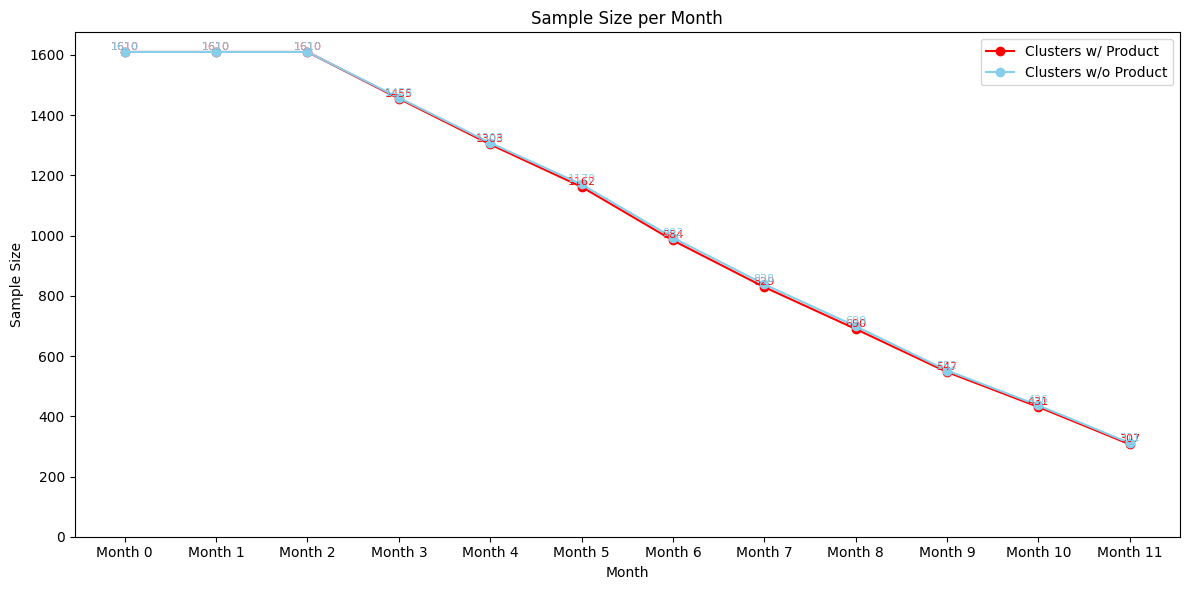

In [27]:
# Continuing from the previous script

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    sample_sizes = []  # List to hold the sample size for each month
    for month in mrr_columns:
        # For each month, calculate the sample size of the non-null data for the current group
        sample_size = len(
            final_dataset_with_monthly_mrr[
                (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
                & final_dataset_with_monthly_mrr[month].notna()
            ][month]
        )
        sample_sizes.append(sample_size)

    plt.plot(
        mrr_columns,
        sample_sizes,
        marker="o",
        linestyle="-",
        label=group_rename[original_group],
        color=color,
    )

    for i, size in enumerate(sample_sizes):
        plt.text(
            mrr_columns[i],
            size,
            f"{size}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Sample Size per Month")
plt.xlabel("Month")
plt.ylabel("Sample Size")
plt.legend(loc="upper right")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Revenue Allocation

### Approach #1 - No Bucket

In [28]:
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame
data = df_raw.copy()

# Ensure both 'ds' and product_ds columns in 'data' DataFrame are in datetime format
data['ds'] = pd.to_datetime(data['ds'])
data[product_ds] = pd.to_datetime(data[product_ds])

# Filter rows based on the condition that product_ds >= 'ds' and product_ds < '2024-02-01'
filtered_data = data[(data[product_ds].dt.to_period('M') <= data['ds'].dt.to_period('M')) & (data['ds'] <= pd.Timestamp('2024-01-01'))]

# Calculate the total sum of MRR for the filtered data
total_mrr_sum = filtered_data['cluster_mrr_total'].sum()

# Print the total sum of MRR formatted with no decimals
print(f"Total sum of MRR for filtered clusters: ${total_mrr_sum:,.0f}")

# Calculate and print the number of unique clusters
unique_clusters_count = filtered_data['cluster_id'].nunique()
print(f"Number of unique clusters: {unique_clusters_count}")

# Get the baseline MRR percentage from 'average_percentage_mean'
baseline_mrr_percentage = average_percentage_mean

# Print the baseline MRR percentage with no decimals
print(f"Baseline MRR Percentage (average): {baseline_mrr_percentage:.0f}%")

# Calculate the incremental revenue percentage
incremental_revenue_percentage = 100 - baseline_mrr_percentage

# Print the incremental revenue percentage with no decimals
print(f"Incremental Revenue Percentage (1 - Baseline): {incremental_revenue_percentage:.0f}%")

# Calculate incremental revenue from the usage of product
incremental_revenue = total_mrr_sum * ((1 - baseline_mrr_percentage / 100))

# Print the incremental revenue with no decimals
print(f"Incremental revenue from product usage: ${incremental_revenue:,.0f}")

Total sum of MRR for filtered clusters: $59,464,726
Number of unique clusters: 5443
Baseline MRR Percentage (average): 81%
Incremental Revenue Percentage (1 - Baseline): 19%
Incremental revenue from product usage: $11,490,506


### Approach #2: Six-Month Buckets

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime

# # Assuming df_raw is your original DataFrame

# # Create a copy of the original DataFrame
# data = df_raw.copy()

# # Ensure product_ds is in datetime format
# data[product_ds] = pd.to_datetime(data[product_ds])

# # Define the comparison end date as the start of the month for '2024-01-01'
# comparison_end_date = datetime(2024, 1, 1)

# # Filtering based on the month, considering year and month only
# filtered_data = data[
#     (data[product_ds].dt.year < comparison_end_date.year) |
#     ((data[product_ds].dt.year == comparison_end_date.year) & 
#      (data[product_ds].dt.month <= comparison_end_date.month)) &
#     (data[product_ind] == 1)
# ].drop_duplicates(subset='cluster_id').copy()

# # Calculate the month difference and cap at 11
# filtered_data['Month Difference'] = ((comparison_end_date.year - filtered_data[product_ds].dt.year) * 12 +
#                                      comparison_end_date.month - filtered_data[product_ds].dt.month).clip(upper=11)

# # Bucket the 'Month Difference' into '< 6 months' and '>= 6 months'
# filtered_data['Tenure Bucket'] = filtered_data['Month Difference'].apply(lambda x: '< 6 months' if x < 6 else '>= 6 months')

# # Aggregate the data for plotting
# distribution = filtered_data['Tenure Bucket'].value_counts().reset_index()
# distribution.columns = ['Tenure Bucket', 'Unique Clusters']

# # Plotting
# plt.figure(figsize=(10, 6))
# plot = sns.barplot(x='Tenure Bucket', y='Unique Clusters', data=distribution, color='skyblue')

# # Adding data labels without decimals
# for p in plot.patches:
#     height = p.get_height()
#     plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
#                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# plt.title('Distribution of Unique Clusters by Product Tenure')
# plt.xlabel('Product Tenure')
# plt.ylabel('Count of Unique Clusters')
# plt.tight_layout()
# plt.show()


### Approach #3: Montly Buckets

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime

# # Create a copy of the original DataFrame
# data = df_raw.copy()

# # Ensure product_ds is in datetime format
# data[product_ds] = pd.to_datetime(data[product_ds])

# # Define the comparison end date as the start of the month for '2024-01-01'
# comparison_end_date = datetime(2024, 1, 1)

# # Filtering based on the month, considering year and month only
# filtered_data = data[
#     (data[product_ds].dt.year < comparison_end_date.year) |
#     ((data[product_ds].dt.year == comparison_end_date.year) & 
#      (data[product_ds].dt.month <= comparison_end_date.month)) &
#     (data[product_ind] == 1)
# ].drop_duplicates(subset='cluster_id').copy()

# # Calculate the month difference and cap at 11
# filtered_data['Month Difference'] = ((comparison_end_date.year - filtered_data[product_ds].dt.year) * 12 +
#                                      comparison_end_date.month - filtered_data[product_ds].dt.month).clip(upper=11)

# # Aggregate the data for plotting
# distribution = filtered_data['Month Difference'].value_counts().sort_index().reset_index()
# distribution.columns = ['Month Difference', 'Unique Clusters']

# # Plotting
# plt.figure(figsize=(10, 6))
# plot = sns.barplot(x='Month Difference', y='Unique Clusters', data=distribution, color='skyblue')

# # Adding data labels without decimals
# for p in plot.patches:
#     height = p.get_height()
#     plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
#                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# plt.title('Distribution of Unique Clusters by Month Difference')
# plt.xlabel('Product Tenure (Capped at 12)')
# plt.ylabel('Count of Unique Clusters')
# plt.tight_layout()
# plt.show()

In [31]:
# import pandas as pd
# from datetime import datetime

# # Create a copy of the original DataFrame
# data = df_raw.copy()

# # Ensure product_ds is in datetime format
# data[product_ds] = pd.to_datetime(data[product_ds])

# # Define the comparison end date as the start of the month for '2024-01-01'
# comparison_end_date = datetime(2024, 1, 1)

# # Filtering based on the month, considering year and month only
# filtered_data = data[
#     (data[product_ds].dt.year < comparison_end_date.year) |
#     ((data[product_ds].dt.year == comparison_end_date.year) & 
#      (data[product_ds].dt.month <= comparison_end_date.month)) &
#     (data[product_ind] == 1)
# ].drop_duplicates(subset='cluster_id').copy()

# # Calculate the month difference
# filtered_data['Month Difference'] = ((comparison_end_date.year - filtered_data[product_ds].dt.year) * 12 +
#                                      comparison_end_date.month - filtered_data[product_ds].dt.month)

# # Total number of clusters
# total_clusters = len(filtered_data)
# print(f"Total number of clusters: {total_clusters}")

# # Breakdown by tenure buckets
# filtered_data['Tenure Bucket'] = pd.cut(filtered_data['Month Difference'],
#                                         bins=[-1, 5, 11, float('inf')],
#                                         labels=['< 6 months', '6-11 months', '>= 12 months'])
# tenure_breakdown = filtered_data['Tenure Bucket'].value_counts().reindex(['< 6 months', '6-11 months', '>= 12 months'])
# print("\nBreakdown by Tenure Bucket:\n", tenure_breakdown)

# # Breakdown by each month (up to 12 months for simplicity)
# month_breakdown = filtered_data['Month Difference'].apply(lambda x: min(x, 11)).value_counts().sort_index()
# print("\nBreakdown by Each Month (Capped at 12):\n", month_breakdown)


# Appendix

### Churn Chart

/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_2960/3740614204.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_2960/3740614204.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_2960/3740614204.py:19: PerformanceWar

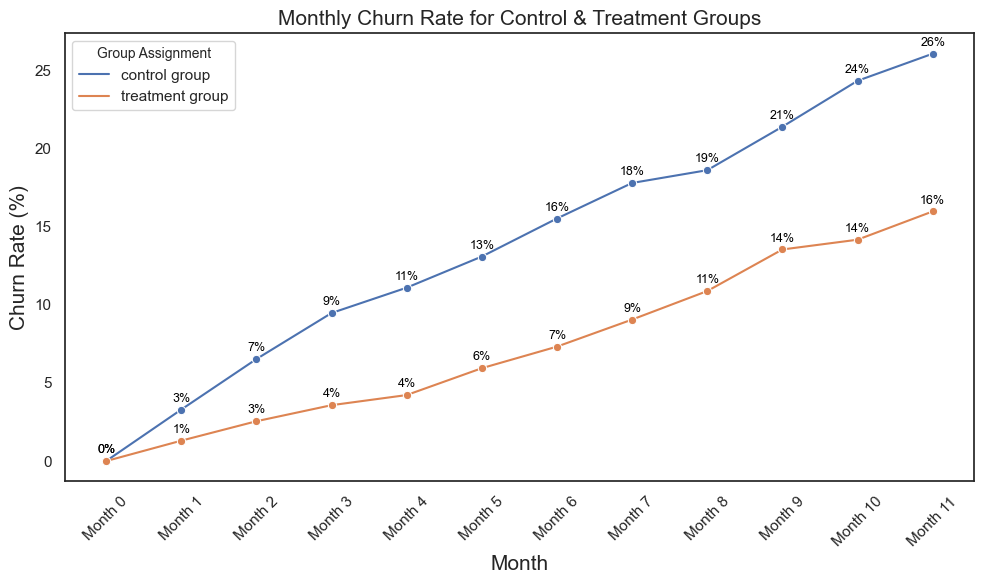

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_dataset_with_monthly_mrr' is your DataFrame and is already loaded

# Iterate over the DataFrame to create churn indicator columns based on the specified conditions
for month in range(13):
    mrr_col = f'Month {month}'  # Corrected column names
    churn_col = f'Month {month}_churn'
    
    # Define conditions for churn indicator
    conditions = [
        (final_dataset_with_monthly_mrr[mrr_col] == 0),  # Churn if value is 0
        (final_dataset_with_monthly_mrr[mrr_col].notnull())  # Not churn if value is not 0 and not null
    ]
    choices = [1, 0]  # Churn indicator values
    final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)

# Initialize an empty DataFrame to store churn rates
churn_rates = pd.DataFrame()

# List of churn indicator columns
churn_indicator_columns = [f'Month {i}_churn' for i in range(13)]

# Calculate churn rates
for month_idx, col in enumerate(churn_indicator_columns):
    # Group by 'group_assignment' and calculate churned clusters and total clusters with data
    churn_data = final_dataset_with_monthly_mrr.groupby('group_assignment')[col].agg(
        churned_clusters=np.sum,
        total_clusters_with_data=pd.Series.count
    ).reset_index()

    # Calculate churn rate
    churn_data['churn_rate'] = (churn_data['churned_clusters'] / churn_data['total_clusters_with_data']) * 100
    churn_data['month'] = f'Month {month_idx}'

    # Append to the churn_rates DataFrame
    churn_rates = pd.concat([churn_rates, churn_data], ignore_index=True)

# Filter to include only Month 0 to Month 11
churn_rates = churn_rates[churn_rates['month'].isin([f'Month {i}' for i in range(12)])]

# Set seaborn style for the plot
sns.set(style="white", rc={"axes.grid": False})

# Create a line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=churn_rates, x='month', y='churn_rate', hue='group_assignment', marker='o')

# Plot enhancements
plt.title('Monthly Churn Rate for Control & Treatment Groups', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Churn Rate (%)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Group Assignment', title_fontsize='10', fontsize='11')

# Adding data labels
for index, row in churn_rates.iterrows():
    plt.text(x=row['month'], y=row['churn_rate']+0.5,  # Slightly adjust the height for visibility
             s=f'{row["churn_rate"]:.0f}%', ha='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()

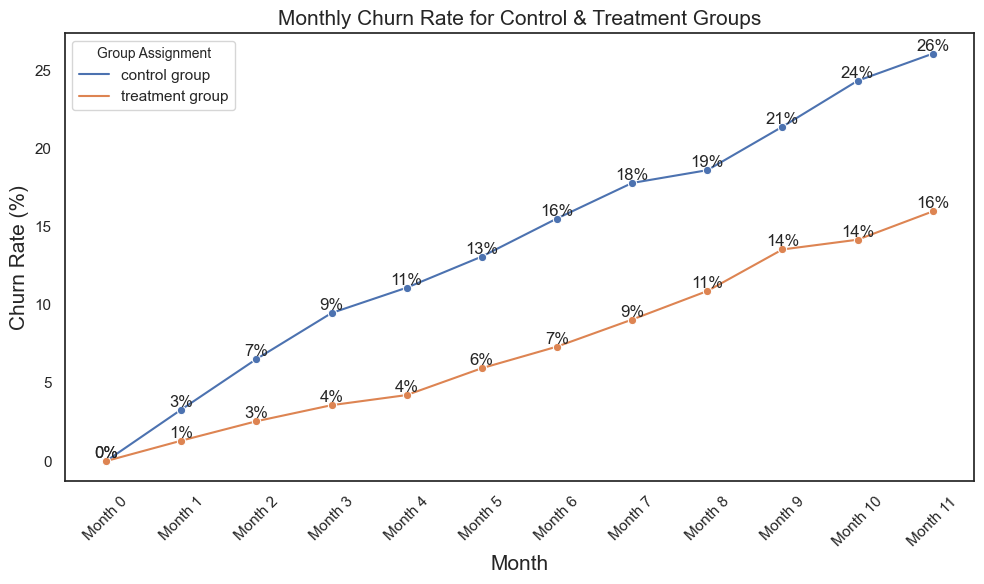

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of month columns with churn indicators
churn_indicator_columns = [f'Month {i}_churn' for i in range(13)]

# Initialize an empty DataFrame to store churn rates
churn_rates = pd.DataFrame()

# Iterate over each churn indicator column
for col in churn_indicator_columns:
    # Group by 'group_assignment' and calculate the sum (for churned) and count of non-null values (for total)
    churn_data = final_dataset_with_monthly_mrr.groupby('group_assignment')[col].agg(['sum', 'count'])

    # Calculate churn rate, avoiding division by zero with `np.where`
    churn_data['churn_rate'] = np.where(churn_data['count'] > 0, (churn_data['sum'] / churn_data['count']) * 100, np.nan)

    # Rename columns for clarity
    churn_data.columns = ['churned_clusters', 'total_clusters_with_data', 'churn_rate']

    # Add the month information to the DataFrame
    churn_data['month'] = col.replace('_churn', '')

    # Append to the churn_rates DataFrame
    churn_rates = pd.concat([churn_rates, churn_data.reset_index()])

# Reset index to make 'group_assignment' and 'month' regular columns
churn_rates = churn_rates.reset_index(drop=True)

# Filter the churn_rates DataFrame to include only Month 0 to Month 11
filtered_churn_rates = churn_rates[churn_rates['month'].isin([f'Month {i}' for i in range(12)])]

# Set the style of seaborn for no grid
sns.set(style="white", rc={"axes.grid": False})

# Create a line plot of churn rate over the months for each group_assignment
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
lineplot = sns.lineplot(data=filtered_churn_rates, x='month', y='churn_rate', hue='group_assignment', marker='o')

# Enhance the plot
plt.title('Monthly Churn Rate for Control & Treatment Groups', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Churn Rate (%)', fontsize=15)
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.legend(title='Group Assignment', title_fontsize='10', fontsize='11')

# Add data labels to the chart
for i, row in filtered_churn_rates.iterrows():
    plt.text(row['month'], row['churn_rate'], f'{row["churn_rate"]:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

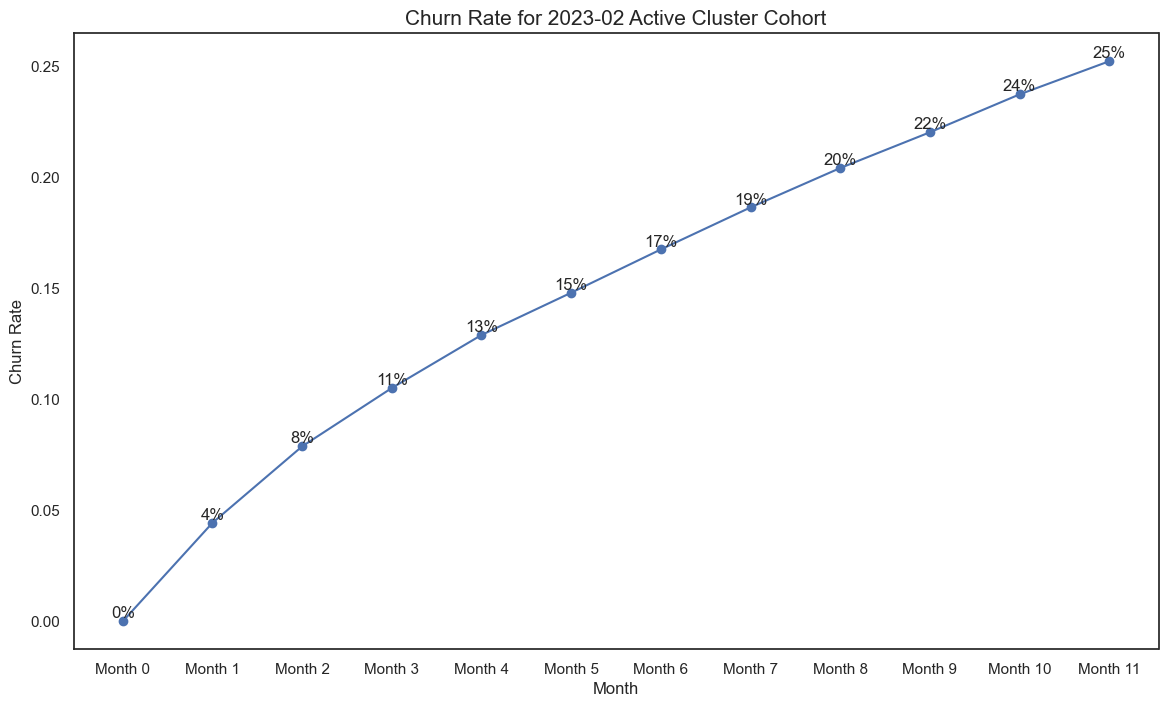

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = df_raw.copy()
data['ds'] = pd.to_datetime(data['ds'])

# Reference date
reference_date = pd.to_datetime('2023-02-01')

# Extract year and month for both `ds` and `reference_date`, then calculate the month difference
data['year'], data['month'] = data['ds'].dt.year, data['ds'].dt.month
ref_year, ref_month = reference_date.year, reference_date.month

# Calculate month difference as 12 times the year difference plus the month difference
data['month_diff'] = (data['year'] - ref_year) * 12 + (data['month'] - ref_month)

# Now, you can pivot your table with this adjusted 'month_diff'
pivot_table = data.pivot_table(index='cluster_id', columns='month_diff', values='cluster_mrr_total', fill_value=0, aggfunc='sum').reset_index()

# Clean-up: You might want to drop the temporary columns 'year' and 'month' if they are no longer needed
data.drop(columns=['year', 'month'], inplace=True)

# Filter rows where month 0 is not zero
pivot_table = pivot_table[pivot_table[0] != 0]

# Calculate churn rates for each month from 0 to 11
churn_rates = []
for month in range(12):  # Iterate through months 0 to 11
    churn_count = pivot_table[pivot_table[month] == 0].shape[0]
    total_count = pivot_table.shape[0]
    churn_rate = churn_count / total_count
    churn_rates.append(churn_rate)

# Plot churn rates
plt.figure(figsize=(14, 8))  # Set figure size
plt.plot(range(12), churn_rates, marker='o', linestyle='-', color='b')

# Adding data labels for each point
for i, rate in enumerate(churn_rates):
    plt.text(i, rate, f"{rate:.0%}", ha='center', va='bottom')

plt.title('Churn Rate for 2023-02 Active Cluster Cohort', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(range(12), labels=[f'Month {i}' for i in range(12)])
plt.grid(False)
plt.show()

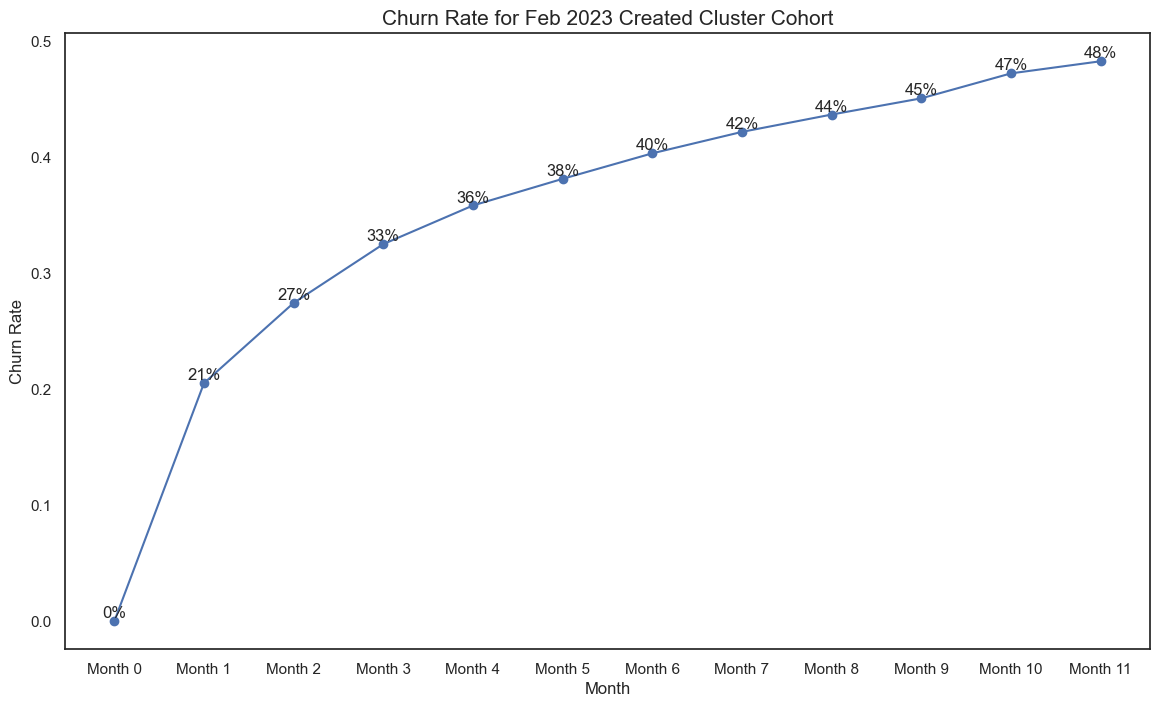

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = df_raw.copy()

data['ds'] = pd.to_datetime(data['ds'])
data['created_at'] = pd.to_datetime(data['created_at'])  # Ensure 'created_at' is in datetime format

# Narrow down to the population created in February 2023
start_date = pd.to_datetime('2023-02-01')
end_date = pd.to_datetime('2023-02-28')
data = data[(data['created_at'] >= start_date) & (data['created_at'] <= end_date)]

# Reference date
reference_date = pd.to_datetime('2023-02-01')

# Extract year and month for both `ds` and `reference_date`, then calculate the month difference
data['year'], data['month'] = data['ds'].dt.year, data['ds'].dt.month
ref_year, ref_month = reference_date.year, reference_date.month

# Calculate month difference as 12 times the year difference plus the month difference
data['month_diff'] = (data['year'] - ref_year) * 12 + (data['month'] - ref_month)

# Now, you can pivot your table with this adjusted 'month_diff'
pivot_table = data.pivot_table(index='cluster_id', columns='month_diff', values='cluster_mrr_total', fill_value=0, aggfunc='sum').reset_index()

# Clean-up: You might want to drop the temporary columns 'year' and 'month' if they are no longer needed
data.drop(columns=['year', 'month'], inplace=True)

# Filter rows where month 0 is not zero
pivot_table = pivot_table[pivot_table[0] != 0]

# Calculate churn rates for each month from 0 to 11
churn_rates = []
for month in range(12):  # Iterate through months 0 to 11
    churn_count = pivot_table[pivot_table[month] == 0].shape[0]
    total_count = pivot_table.shape[0]
    churn_rate = churn_count / total_count
    churn_rates.append(churn_rate)

# Plot churn rates
plt.figure(figsize=(14, 8))  # Set figure size
plt.plot(range(12), churn_rates, marker='o', linestyle='-', color='b')

# Adding data labels for each point
for i, rate in enumerate(churn_rates):
    plt.text(i, rate, f"{rate:.0%}", ha='center', va='bottom')

plt.title('Churn Rate for Feb 2023 Created Cluster Cohort', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(range(12), labels=[f'Month {i}' for i in range(12)])
plt.grid(False)
plt.show()


To Dos
1. check the churn rates by groups
2. check the charts for other products
3. check with Patrick on the metric to use
4. Check with Erik on the model performance

Next Steps
1. have a version of excluding the churned total_clusters
2. check org level is stil the same?
3. Add more granularity to the allocation framework, e.g. 6 months, monthsly, etc.

Call Outs
1.  this is including the outliers and applying the general incremental revenue framework to them
2. this doesn't consider the unsubscribe TimeSeries actviities
3. used qualification definition